<a id="cont"></a>

# Table of Contents
<a href=#one>1. introduction</a>

<a href=#two>2. Problem statement</a>

<a href=#three>3. Importing Packages</a>


<a href=#four>4. Loading Data</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Data Engineering</a>


<a href=#seven>7. Modelling</a>

<a href=#eight>8. Model Perfomance</a>

<a href=#nine>9. Model Improvement</a>

<a href=#ten>10. Model Evaluation</a>

<a href=#eleven>11. Model Explanations</a>

<a href=#twelve>12. Comet Experiment</a>

<a href=#thirteen>13. Conclusion</a>

<a href=#fourteen>14. References</a>




<a id="one"></a>
# 1. Introduction

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

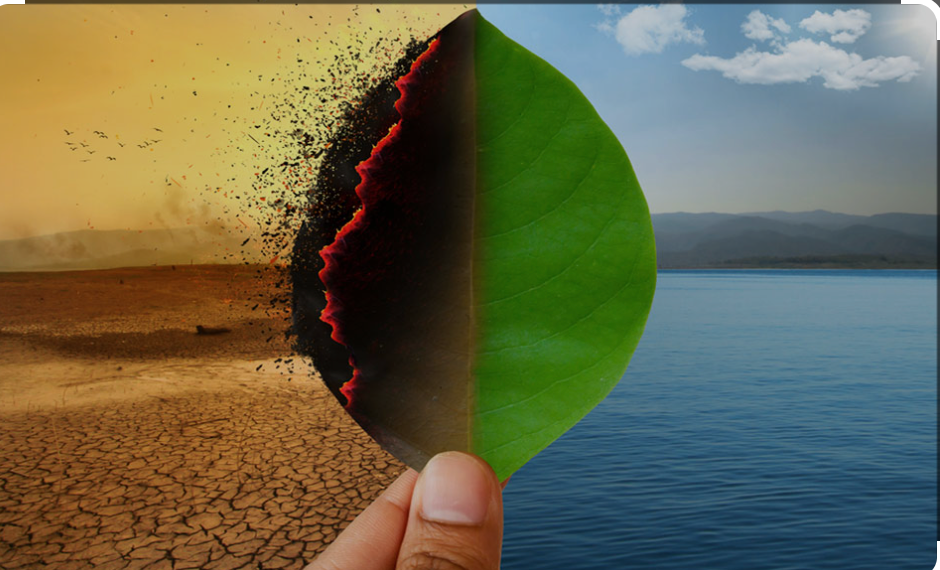

Climate Change is a major issue of our time and we are at a defining moment. From shifting weather patterns that threaten food production, to rising sea levels that increase the risk of catastrophic flooding, the impacts of climate change are global in scope and unprecedented in scale.

The impacts of climate change are now widely discussed through a variety of mediums. Originating from social media, scientific papers, newspaper articles, and blog posts, a broad spectrum of climate change opinions, subjects, and sentiments exist. Newspaper articles often dismiss or sensationalize the effects of climate change due to journalistic biases including personalization,This is solved by listening to what the people are saying on Social Media

The world is dealing with a lot of Climate Change issues and companies are expected to operate and contribute to the worlds economy without harming the environment while maintaining a low carbon footprint.They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. To archieve such a goal it is neccesary to know how people perceive climate change and whether or not they believe that the repercussions of harming the eco-system are catastrophic or merely just an exageration.This would contribute to the market research efforts in gauging how their product/service may be received by the population.

There are limited places or plartforms for such a study to carried out, so social media is used to gather data and study it to undertand the perspective of millions around the world towards climate change. Twitter posts are used as input and the sentiment of the tweet is used to interpret the the mindset towards climate change for millions around the world. 

<a id="two"></a>
# 2.  Problem Statement: Twitter Sentiment Classification

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The aim is to design and create a Machine learning Model that is able to classify whether or not a person believes in climate change. Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.Twitter has become a valuable resource for analyzing current events and headline news.

We are presented with a Data set consisting of 3 features, namely:

 - Sentiment

 - Message

 - TweetId

We will be engaging in the following:

1. Analyse the given data;
2. Identify potential errors in the data and clean the existing data set;
3. Determine if additional features can be added to enrich the data set;
4. Build a models that are capable of forecasting the the sentiment of the Tweet Message;
5. Evaluate the accuracy of the best machine learning model;
6. Explain the inner working of the model to a non-technical audience with a presentation

 <a id="three"></a>
# 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [41]:
# utilities
import re
import numpy as np
import pandas as pd
import string
import urllib
import matplotlib.pyplot as plt

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly import graph_objects as go

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from comet_ml import Experiment

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="four"></a>
# 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
# Load the train and test data

# Train data
df_train = pd.read_csv('train.csv')

# Test data
df_test= pd.read_csv('test_with_no_labels.csv')

<a id="five"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="threeone"></a>

### 5.1 Overview
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

This was be done in the following format:

- Basic Analysis 
- Univariate Non Graphical Analysis 
- Univariate Graphical Analysis 
- Multivriate Non Graphical Analysis 
- Multivariate Graphical Analysis 



<div align="left" style="width: 600px; text-align: left;">
<img src="https://github.com/Explore-AI/Pictures/blob/f860f39251c523eda779dea0140316ccbefdd8e0/eda_map.jpg?raw=True"
     alt="EDA Diagram"
     style="padding-bottom=0.5em"
     width=600px/>
</div>

<a id="threetwo"></a>
### 5.2 Basic Analysis 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
# Check the first five rows of the dataset
df_train.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

In [4]:
# Check the shape of the dataset
df_train.shape

(15819, 3)

The shape command shows us that we have 15819 observations across 3 features.

In [5]:
# print a concise summary of a DataFrame

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The concise summary of the data shows the features in our dataframe, also the number of columns that are not empty and the data types.

- The result shows we have no null values, this will be further explored to confirm in details.
- We have two of the columns to be of integer values and one as an object (string)
- The dataset runs on 370.9+ kb of the system memory.

In [6]:
# Check for missing values in individual columns

df_train.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Hurray! There is no missing value in our data.

We can explore futher our data using using the univariate and multivariate approach.

---

<a id="threethree"></a>

### 5.3 Univariate Non-graphical 
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

---


This is the simplest form of data analysis, in this stage we use just one variable to research the information about the data set. The standard goal of univariate non-graphical EDA is to know the underlying sample distribution in the data.

In [7]:
# look at data statistics
df_train.describe()

sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000

In [8]:
df_train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64


<div class="alert alert-block alert-info">
<b>Note:</b> This shows the data is not evenly distributed across the sentiments as shown in our value count.
</div>

---

<a id="threefive"></a>

### 5.4 Univariate Analysis: Graphical
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

---


In [9]:
def univariant_analysis(df):
    """
    This is used to provide graphical information of univariant anlysis on the numeric data type.
    it plots the density subplots and the histogram.
    """
    features = ['sentiment'] 
    df[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
    df[features].hist(figsize=(10,5))
    return features

In [10]:
# Plotting the distribution for dataset.
ax = df_train.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['Anti','Neutral', 'Pro', 'News'], rotation=0)
plt.ylabel('Frequency', fontsize=15)
#ax.set_yticklabels(['Count'], rotation=90)
# Storing data in lists.
text, sentiment = list(df_train['message']), list(df_train['sentiment'])


<div class="alert alert-block alert-info">
<b>Note:</b> The graph shows the data is not evenly distributed across the sentiments as shown in our value count.
</div>

This illustrates the sentiment entities in the dataset in a more understandable sense, the sentiment values are given meaning with -1 as Anti, 0 as Neutral, 1 as Pro and 2 as News. And the visual clearly shows on how each TweetiD is tied to a tweet Message. 

In [11]:
# Visualising the percentage distribution of sentiments
plt.pie(df_train.sentiment.value_counts().values, 
        labels = df_train.sentiment.value_counts().index, 
        autopct = '%2.1f%%', textprops={'fontsize': 17})
plt.title('Tweet Sentiment Percentage Distribution', fontsize=18)
plt.tight_layout()
plt.show()


---

<a id="threefour"></a>

### 5.5 Multivariate Non-Graphical
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

---

In [12]:
# Let's look for the 
def correlation(df):
    """
    This function visualizes the correlation between the sentiment and tweeid
    """
    df.corr()
    corr_matrix = df.corr()
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
    return corr_matrix

In [13]:
correlation(df_train);

As expected there is no correlation between `tweetid` and the `sentiment`.

We can explore further our data by creating a new features `length` to check the number of characters present in each of the tweets

In [14]:
df_train['length'] = df_train['message'].apply(len)

In [15]:
df_train

sentiment                                            message  tweetid  \
0              1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1              1  It's not like we lack evidence of anthropogeni...   126103   
2              2  RT @RawStory: Researchers say we have three ye...   698562   
3              1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4              1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
...          ...                                                ...      ...   
15814          1  RT @ezlusztig: They took down the material on ...    22001   
15815          2  RT @washingtonpost: How climate change could b...    17856   
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248   
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

       length  
0         140  
1          62  
2         140  
3          99  
4         122  
...       ...  
15814     140  
15815     119  
15816     133  
15817     128  
15818     102  

[15819 rows x 4 columns]

Plotting the distribution of the `length`

In [16]:
df_train['length'].plot(bins =100, kind ='hist');

Let's explore the discriptive statistics of the `lenght` feature

In [17]:
df_train['length'].describe()

count    15819.000000
mean       123.774132
std         23.332433
min         14.000000
25%        114.000000
50%        133.000000
75%        140.000000
max        208.000000
Name: length, dtype: float64

What kind of tweet has 14 characters? Let's see and what sentiment does it carry.

In [18]:
df_train[df_train['length']==14]['message'].iloc[0], 

('global warming',)

In [19]:
df_train[df_train['length']==14]['sentiment'].iloc[0]

0

It's `global warming` and it's neutral

In [20]:
fig = go.Figure(go.Funnel(
    y = ['Pro', 'News', 'Neutral', 'Anti'], 
    x = df_train.value_counts(normalize = True) * 100 
    ))
fig.show()

let's check for some common words in the tweets 

**Word Cloud**
An image composed of words used in a particular text, in which the size of each word indicates its frequency or importance.

In [21]:
# Plotting the word cloud for the tweet
sentences = df_train['message'].tolist()
len(sentences)
sentences_as_one_string = ''.join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string));

Some of the common words in our tweets include Climate Change, global warming, A lot of Retweets 'RT', Trump amongst other words came so frequents.

In [22]:
# Let's divide our dataset into individual sentiment group.
pro = df_train[df_train['sentiment']==1]
anti = df_train[df_train['sentiment']== -1]
news = df_train[df_train['sentiment']==2]
neutral = df_train[df_train['sentiment']==0]

Let's plot word cloud for the `Pro` sentiment.

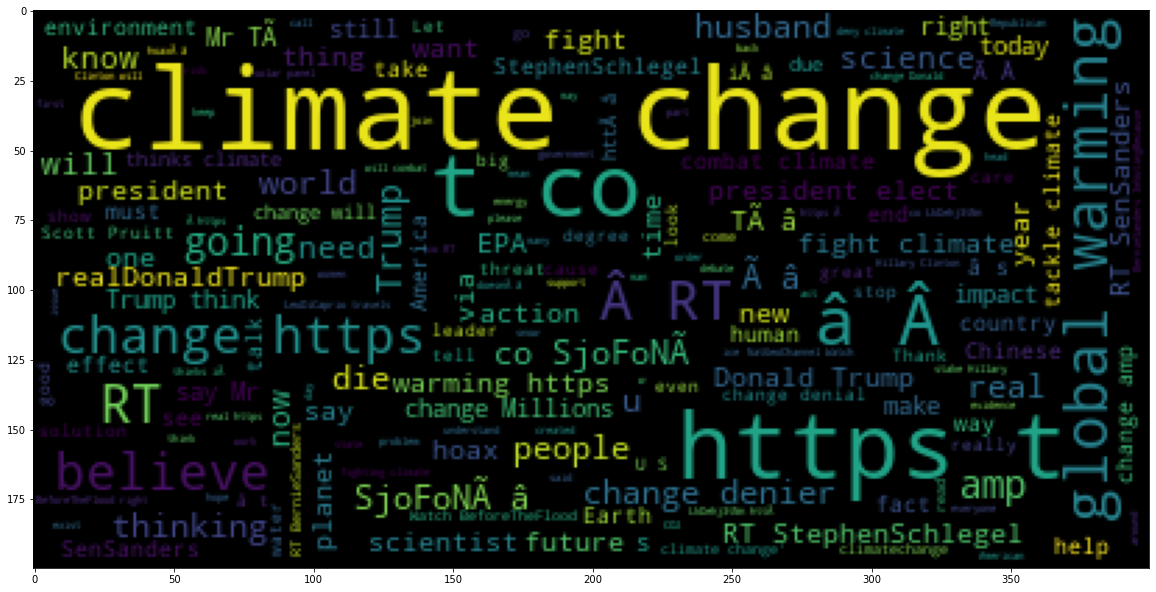

In [23]:
pro = pro['message'].tolist()
len(pro)
pro_as_one_string = ''.join(pro)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pro_as_one_string));

The wordcloud above shows the 100 most frequent words used for the 1 Pro sentiment tweets. "Climate" and "change" are the most frequent words but that is to be expected because we have a dataset with tweets about climate change thus we remove those words in order to identify the important words for the specific sentiment. Further we can see that positive words like "believe", "real" and "action" are also frequently used.

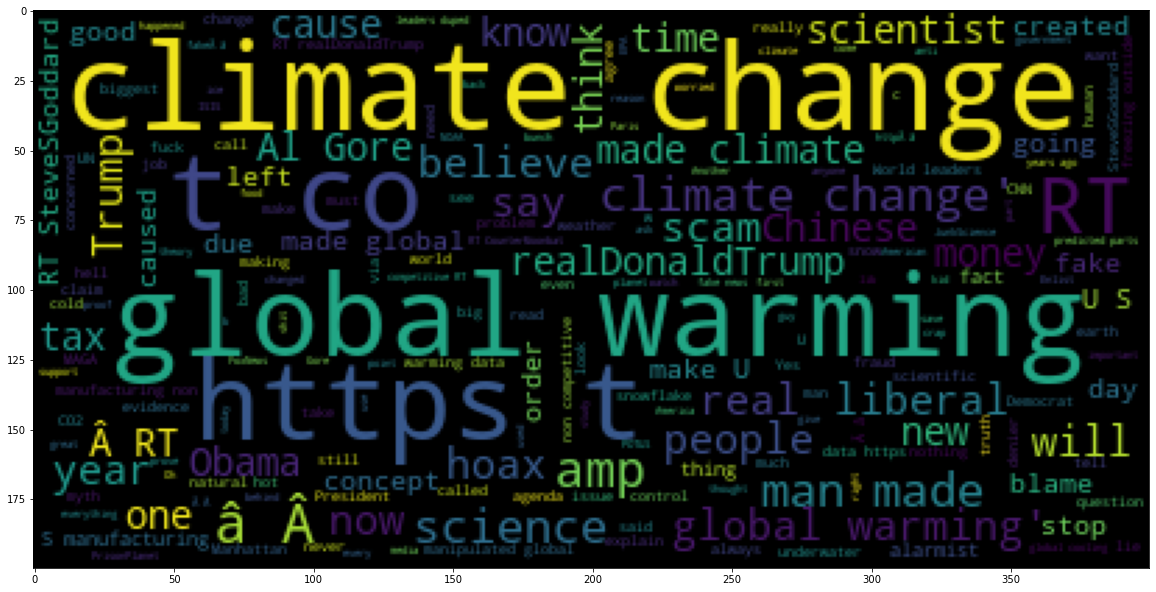

In [24]:
anti = anti['message'].tolist()
len(anti)
anti_as_one_string = ''.join(anti)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(anti_as_one_string));

The wordcloud above shows the 100 most frequent words used for the -1 Anti sentiment tweets. Here we can see high frequency negative words like, "fake", "hoax" and "scam" is more apparent in tweets with this sentiment.

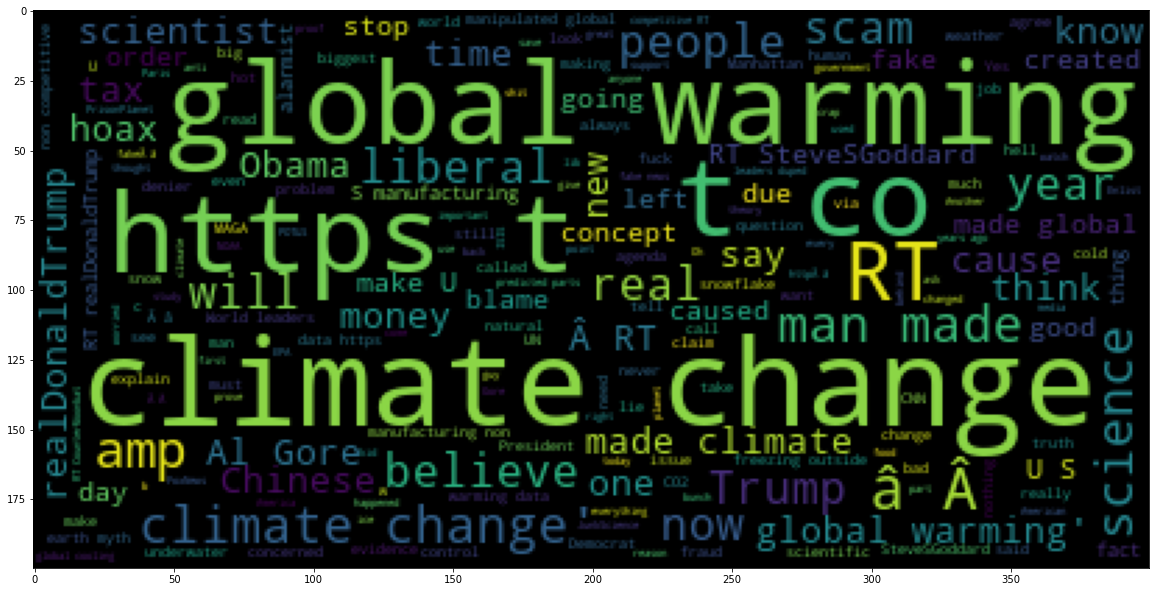

In [25]:
news = news['message'].tolist()
len(news)
news_as_one_string = ''.join(anti)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(news_as_one_string));

The wordcloud above shows the 100 most frequent words used for the 0 Neutral sentiment tweets. There is a relative balance between positive and negative words that are used for neutral sentiment.

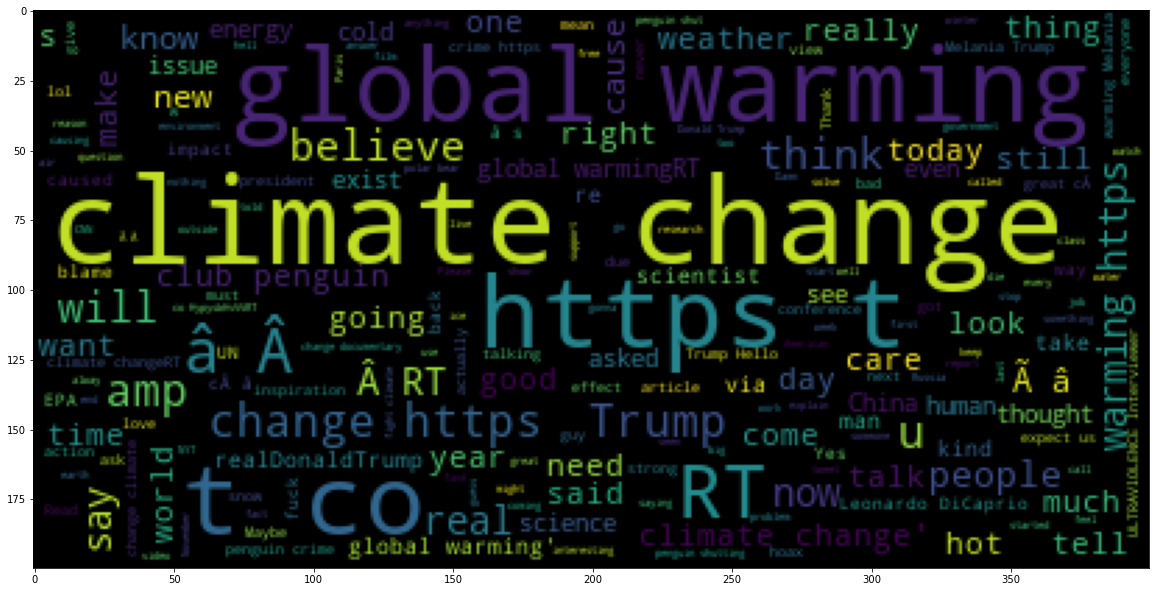

In [26]:
neutral = neutral['message'].tolist()
len(neutral)
neutral_as_one_string = ''.join(neutral)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neutral_as_one_string));

The wordcloud above shows the 100 most frequent words used for the 2 News sentiment tweets. Here we can see words like, "website", "article" and "report" that points to tweets that reference news sources

<a id="six"></a>
# 6. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Data Preprocessing 

Data preprocessing is a process of preparing raw data and making it suitable for a machine learning model. It is the first and crucial step of creating a machine learning model.

When creating a machine learning project, it is not always a case that we come across clean and formatted data. And while doing any operations on data, it is mandatory to clean it and set it up in a formatted manner. So for this, we use data preprocessing task.

**Why do we need Data Preprocessing?**

Data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is a set of required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

**The Preprocessing we applied to the data is as follows:**

- Clearing of noises which include weburl, converting all characters into lowercase and removal of punctuations
- Removal of stopwords and numeric characters
- Lemmatization and stemming
- Vectorization



**Removing Noise**

**Web Url**

We are removing web url in form of `http...` and replacing them to with `url-web` so that our model read all occurrence of it as web url.

In [27]:
# set the regex pattern for url removal
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'

subs_url = r'url-web'
#apply the function on our dataset
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

There is a method in sklearn called `CountVectorizer`. CountVectorizer can carry out the following:
- Removal of punctuations
- Removal of stopwords
- Stemming and lemmatization
- Vectorization

In [28]:
#initializing the function
vecti = CountVectorizer()
# applying it to our train data
X_count = vecti.fit_transform(df_train['message'].values.astype(str))

This converts a collection of text documents to a matrix of token counts. This implementation produces a sparse representation of the counts using scipy.

In [29]:
vect_20 = CountVectorizer(lowercase=True, stop_words='english', max_features=20000,analyzer='word', ngram_range=(1, 3))
X_count = vect_20.fit_transform(df_train['message'].values.astype(str))

In [30]:
#Checking the features name
vect_20.get_feature_names()

['00',
 '000',
 '000 000',
 '000 000 000',
 '000 000 year',
 '000 people',
 '000 year',
 '000 year research',
 '000 years',
 '000 years climate',
 '10',
 '10 9c',
 '10 9c natgeochannel',
 '10 biggest',
 '10 years',
 '100',
 '100 billion',
 '100 billion dollars',
 '100 countries',
 '100 countries url',
 '100 days',
 '100 dead',
 '100 dead winter',
 '100 renewable',
 '100 solutions',
 '100 year',
 '100 years',
 '1000',
 '105',
 '11',
 '11 terrifying',
 '11 terrifying climate',
 '110',
 '115',
 '12',
 '12 globalgoals',
 '12 globalgoals directly',
 '12 science',
 '12 science standards',
 '12 years',
 '125',
 '125 mins',
 '125 mins clinton',
 '13',
 '13 year',
 '13 year old',
 '14',
 '15',
 '15 trillion',
 '15 years',
 '150',
 '150 million',
 '150 years',
 '150 years global',
 '16',
 '16 year',
 '17',
 '17 climate',
 '17 climate change',
 '17 states',
 '170',
 '170 billion',
 '170 billion launching',
 '175',
 '18',
 '19',
 '19 house',
 '19 house republicans',
 '19 trillion',
 '190',
 '190 c

In [31]:
# Checking shape again
X_count.shape

(15819, 20000)

**Splitting the data into X (independent) and y (target) features**

In [32]:
X=X_count.toarray()
y=df_train.sentiment

**Training and Validation**

Here we will divide our data into trainning and validation data

In [33]:
# Separating the 80% data for training data and 20% for validating data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 20, random_state =42)

### Preprocessing Test Dataset


In this section, we going to create a function to get the test datset in same format as our training dataset. A function is appllied so it can be repeated across any dataset provided. The function will take the dataset and process it to return in the same fortmat as training set

In [ ]:
# set the regex pattern for url removal
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'

subs_url = r'url-web'
#apply the function on our dataset
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [ ]:
# Applying the vectorizer on test data
xt = df_test["message"]
vect_mess = vect_20.transform(xt)

vect_mess 

<a id="seven"></a>
## 7. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**Fitting and Scoring Models**

Using a python function, the models are fitted and validated using the validation data set to find the best model in the bunch.
The models are scored using the evaluation metric `f1_score`.

In [34]:
# Creating a dictionary for the models starting with Linear Regression
models ={"Logistic Regression": LogisticRegression(),
        "Random_Forest": RandomForestClassifier(n_jobs=-1,random_state=42),
        "Naive_Bayes_1": MultinomialNB(),
        "Naive_Bayes_2": BernoulliNB(),
        "Classi_Decision_tree": DecisionTreeClassifier(max_depth=2,random_state=42)}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data 
    X_val: val deata (for testing, no labels)
    y_tain: training labels
    y_test val labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        y_pred = model.predict(X_val)
        model_scores[name] = f1_score(y_val, y_pred, pos_label='positive',
                                           average='micro')
    return model_scores

In [35]:
#### Checking model scores
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

{'Logistic Regression': 0.85,
 'Random_Forest': 0.8000000000000002,
 'Naive_Bayes_1': 0.65,
 'Naive_Bayes_2': 0.75,
 'Classi_Decision_tree': 0.5}

**Comparing base models performance**

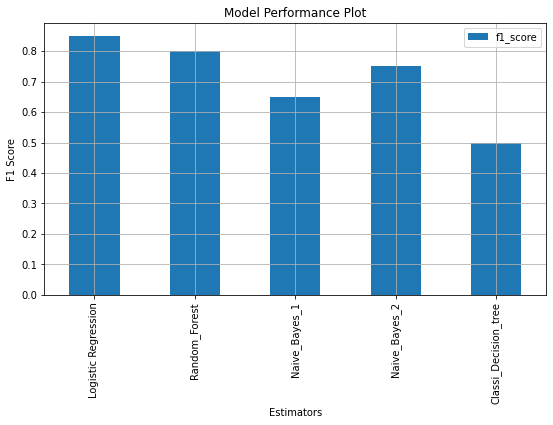

In [36]:
# Compare model performance
model_compare = pd.DataFrame(model_scores, index=["f1_score"])
model_compare.T.plot.bar(figsize=(9,5), title="Model Performance Plot")
plt.xlabel("Estimators")
plt.ylabel("F1 Score")
plt.grid()

<a id="eight"></a>
## 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, the different models used to train the model will be compared and  the best one amongst them is selected to perform hyperparameter tuning on.

**F1-Score**

F1-score is a measure of a model's accuracy on a dataset. It elegantly sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall.It simply measures the percentage of correct predictions that a machine learning model has made. A good F1 score means that you have low false positives and low false negatives. An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0.

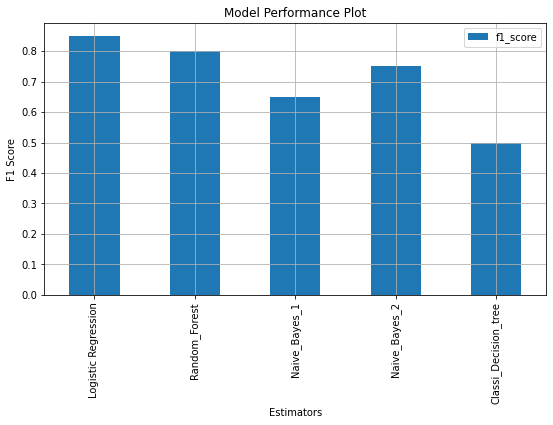

In [37]:
# Compare model performance
model_compare = pd.DataFrame(model_scores, index=["f1_score"])
model_compare.T.plot.bar(figsize=(9,5), title="Model Performance Plot")
plt.xlabel("Estimators")
plt.ylabel("F1 Score")
plt.grid()

<a id="nine"></a>
# 9. Model Improvement
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**Hyperparameter tuning with RandomizedSearchCV**

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins

In [38]:
# Obtaining list of models used
model_lists = list(models.values())
model_lists

[LogisticRegression(),
 RandomForestClassifier(n_jobs=-1, random_state=42),
 MultinomialNB(),
 BernoulliNB(),
 DecisionTreeClassifier(max_depth=2, random_state=42)]

We will be tuning the parameters of the LogisticRegression() model to find the ideal parameters

In [42]:
%%time


# Different logistic regression hyperparameters
log_reg = model_lists[0]
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Instantiate RandomizedSearcgCV model 
rs_model = RandomizedSearchCV(model_lists[0],
                             param_distributions=log_reg_grid,
                             n_iter=1,
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: user 26.9 s, sys: 22.3 s, total: 49.3 s
Wall time: 48.9 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
# Find the best model hyperparameters
rs_model.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [44]:
rs_model.score(X_val, y_val)

0.5

In [45]:
y_predicty = rs_model.predict(X_val)

In [46]:
f1_score(y_val, y_predicty, pos_label='positive',
                                           average='micro')

0.5

<a id="ten"></a>
## 10. Model Evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The project was conducted with the use on Five Models and namely they are, the Logistic Regression, Naive-Bayes MultiNomial NB, Support Vector Machines, DecisionTreeClassifier and the Random Forest Classifier. The models were all trained by being exposed to the features and target variable which they would after have to predict in the Test dataset. The model were all trained  using the same Dataset called the df_train. The models were then used to make predictions and produce the target variable on their own on the test. This was conducted to determine if they would be able to produce the same results in the Target variable of the df_train. 
The accuracy of the prediction results produced by each of the model is determined by comparing the target variable produced by the model to the Target variable it was exposed to in the Training phase. The f1-score was used to measure the accuracy of each model. The model f1-scores were then compared to each other to determine which model was the best performer. The model with the highest F1-score is the best performer.

Models with their respective F1-score:

- Logistic Regression: 0.85
- Random_Forest: 0.65
- Naive_Bayes_1: 0.7
- Naive_Bayes_2: 0.7
- Classi_Decision_tree': 0.5

The Logistic Regression had the best f1-score. which means it achieved better accuracy in its predictions amongst all the model in the project. Thus it is clearly the best suited for the job to predict the sentiment of tweets.  

<a id="eleven"></a>

## 11.  Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

The model will trained(find the patterns) on the training set.

And evaluate it(use the patterns) first on the val set as created initially

This will be done using 5 different machine learning models:

1. Logistic Regression
2. Naive-Bayes MultiNomial NB
3. Support Vector Machines
4. DecisionTreeClassifier
5. Random Forest Classifier

**Logistics Regression**

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lies between 0 and 1.
Logistic Regression is much similar to Linear Regression except for how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
<img
src = 'https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png'>

**Naive-Bayes MultiNomial NB**

Naïve Bayes — a probabilistic approach for constructing the data classification models. It’s formulated as several methods, widely used as an alternative to the distance-based K-Means clustering and decision tree forests, and deals with probability as the “likelihood” that data belongs to a specific class. The Gaussian and Multinomial models of the naïve Bayes exist. The multinomial model provides an ability to classify data, that cannot be represented numerically. Its main advantage is the significantly reduced complexity. It provides an ability to perform the classification, using small training sets, not requiring to be continuously re-trained.(Arthur v. 2021)

**Naive-Bayes Bernoulli**

Bernoulli Naive Bayes is a part of the family of Naive Bayes. It only takes binary values. The most general example is where we check if each value will be whether or not a word that appears in a document. That is a very simplified model. In cases where counting the word frequency is less important, Bernoulli may give better results. In simple words, we have to count every value binary term occurrence features i.e. a word occurs in a document or not. These features are used rather than finding the frequency of a word in the document.

To understand it in layman’s terms,Bernoulli distribution has two mutually exclusive outcomes:P(X=1)=p or P(X=0)=1-p.In BernoulliNB theorem, we can have multiple features but each one is assumed to be binary valued variable i.e. boolean. Therefore, this class requires samples to be represented as binary-valued feature vectors. In case, any other kind of data, is provided, then a BernoulliNB instance may binarize its input.

The decision rule for Bernoulli naive Bayes is based on

<img
src = 'https://miro.medium.com/max/640/0*407t0M4r7MSVsIhF'>

According to the decision rule formula,x needs to be binary. Think about the formula in the case where xi=1 and the case where xi=0. So i is the event where xi=1 or the event where xi=0.


**DecisionTreeClassifier**

The Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches. The decisions or the test are performed on the basis of features of the given dataset. It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions. It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
<img
src = 'https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png'>

**Random Forest Classifier**

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

It works in four steps:

Select random samples from a given dataset.

Construct a decision tree for each sample and get a prediction result from each decision tree.

Perform a vote for each predicted result.

Select the prediction result with the most votes as the final prediction.

<img
src = 'http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg' >


<a id="twelve"></a>

## 12.  Comet Experiments
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

Comet.ml is a powerful tool for machine learning in production. It enables easy integration with multiple programming languages and frameworks, pipelined experiments, dynamic visualization, and project sharing and management within a team.

**Setting up API Key**

In [47]:
# Setting the API key (saved as environment variable)
experiment = Experiment(api_key='MensLWBUC6cZMIY7UXmQ0Eev5',
                        project_name="tweet-classification", workspace="egah1111") 

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to check backend version at URL: 'https://www.comet.com/clientlib/isAlive/ver'
COMET ERROR: Run will not be logged 
For more details, please refer to: https://www.comet.com/docs/python-sdk/warnings-errors/
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/opt/anaconda3/lib/python3.9/site-packages/urllib3/util/connection.py", line 72, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File 

In [ ]:
# Saving metric to add to a dictionary for logging
y_pred = model_lists[0].predict(X_val)
f1 = f1_score(y_val, y_pred, average="micro")
f1

In [ ]:
# Create dictionaries for the data we want to log

params = {"random_state": 42,
          "model_type": "log_reg",
          "scaler": "standard scaler",
          "param_grid": str(log_reg_grid),
          "stratify": True
          }
metrics = {"f1": f1
           }

In [ ]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

**Display** 

Running `experiment.display()` will show the experiments comet.ml page inside the notebook as illustrated below. 

In [ ]:
# Showing experiments
experiment.display()

<a id="thirteen"></a>

## 13. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

The effect of climate change is one that is already imminent. It is a societal issue as well as an existence problem as it threatens to cause danger directly and indirectly to our lives. The business world is not exempted from these problems as we consumers are increasingly clamouring for change from big corporations as regards to their production processes and even raw materials used for production.  

The effects of this change in opinion obviously affects the acceptability of different products. To understand the meaning of these different opinions, a model ought to be able to give businesses some insight on these sentiments.

Using data science, this notebook contains a full data science project cycle developed with the sole aim of building an accurate and indispensable sentiment classification model using text data obtained from tweets relating to climate change. On the notebook is a fully developed model that will assist in predicting the climate sentiment in tweets. This will assist in informing the companies to determine if people, especially their target audience believe whether or not they believe climate change is a real threat.

The application of this model can be found in sentiment analysis problems including election candidate acceptance, educational research, etc. The team is  ready to explore other use cases that will be required in the future.


<a id="fourteen"></a>

## 14. References
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

1. Kurtis Pykes Exploratory Data Analysis: EDA For Categorical Data(Apr 15): https://heartbeat.comet.ml/exploratory-data-analysis-eda-for-categorical-data-870b37a79b65


2. 11 Essential Code Blocks for Complete EDA (Exploratory Data Analysis): https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html


3. Data engineering : https://en.wikipedia.org/wiki/Data_engineering


4. What Is Data Engineering? Responsibilities & Tools : https://www.dremio.com/resources/guides/data-engineering/"


5. logistic regression By George LawtonEd BurnsLinda Rosencrance: 
https://www.techtarget.com/searchbusinessanalytics/definition/logistic-regression


6. What is logistic regression?: https://www.ibm.com/za-en/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.


7. Multinomial Naїve Bayes’ For Documents Classification and Natural Language Processing (NLP),Arthur V. Ratz
May 17, 2021: https://towardsdatascience.com/multinomial-naïve-bayes-for-documents-classification-and-natural-language-processing-nlp-e08cc848ce6


8. Support Vector Machine Algorithm, Article Contributed By aswathisasidharan
: https://www.geeksforgeeks.org/support-vector-machine-algorithm/